In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
taxi_df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
taxi_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [4]:
taxi_df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
taxi_df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [6]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
taxi_df.drop(["unique_id"],axis=1,inplace=True)

In [8]:
taxi_df['date_time_of_pickup'] = pd.to_datetime(taxi_df['date_time_of_pickup'])
taxi_df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [9]:
import calendar

taxi_df['pickup_date']=taxi_df['date_time_of_pickup'].dt.date
taxi_df['pickup_day']=taxi_df['date_time_of_pickup'].apply(lambda x:x.day)
taxi_df['pickup_hour']=taxi_df['date_time_of_pickup'].apply(lambda x:x.hour)
taxi_df['pickup_day_of_week']=taxi_df['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
taxi_df['pickup_month']=taxi_df['date_time_of_pickup'].apply(lambda x:x.month)
taxi_df['pickup_year']=taxi_df['date_time_of_pickup'].apply(lambda x:x.year)

taxi_df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [10]:
taxi_df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
dtype: int64

In [11]:
duplicate=taxi_df.duplicated()
duplicate.sum()

0

In [12]:
def distance(lat1,lon1,lat2,lon2):
    p=0.017453292519943295
    a=0.5 - np.cos((lat2-lat1)*p)/2+np.cos(lat1*p)*np.cos(lat2 * p) * (1-np.cos((lon2-lon1)*p))/2
    return 2 * 3958.756 * np.arcsin(np.sqrt(a))

taxi_df['distance_miles'] = distance(taxi_df.latitude_of_pickup, taxi_df.longitude_of_pickup,taxi_df.latitude_of_dropoff,taxi_df.longitude_of_dropoff)
taxi_df['distance_miles'].info

<bound method Series.info of 0        0.640487
1        5.250670
2        0.863411
3        1.739386
4        1.242218
           ...   
49995    3.069806
49996    0.543517
49997    1.406341
49998    0.413364
49999    0.000000
Name: distance_miles, Length: 50000, dtype: float64>

In [17]:
p=0.017453292519943295
a=0.5 -np.cos((40.712278-40.721319)*p)/2+np.cos(40.721319*p)*np.cos(40.712278 * p) * (1-np.cos((-73.841610--73.844311)*p))/2
a
l=2*3958.756*np.arcsin(np.sqrt(a))
l

0.6404870368605174

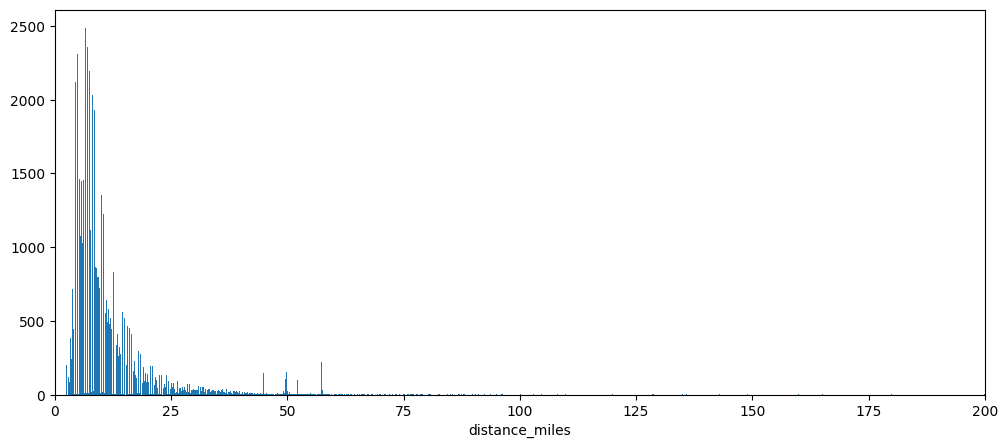

In [15]:
plt.figure(figsize=(12,5))
n,bins,patches = plt.hist(taxi_df.amount,1000)
plt.xlabel('distance_miles')
plt.xlim(0,200)

plt.show();

In [18]:
taxi_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year,distance_miles
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260,11.500927
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639,220.937426
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000,0.760028
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000,1.317378
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000,2.420595
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000,5385.933092


In [19]:
#Identify range
q1 = -73.991152
q3 = -73.963584
iqrlop= q3 - q1
lowlop=q1-1.5*iqrlop
uplop=q3+1.5*iqrlop
uplop,lowlop
#longp=-73.914, -74.035
#latp=40.714, 40.775
#longd=-73.914, -74.035
#latd=40.805, 40.684
#miles=4.9112, -1.730

(-73.922232, -74.032504)

In [20]:
taxi_df=taxi_df[((taxi_df['longitude_of_pickup'] > -78) &
                 (taxi_df['longitude_of_pickup'] < -70)) &
                ((taxi_df['longitude_of_dropoff'] > -78) &
                 (taxi_df['longitude_of_dropoff'] < -70)) &
                ((taxi_df['latitude_of_pickup'] > 37) &
                 (taxi_df['latitude_of_pickup'] < 45)) &
                ((taxi_df['latitude_of_dropoff'] > 37) &
                 (taxi_df['latitude_of_dropoff'] < 45)) &
                 (taxi_df['no_of_passenger'] > 0) &
                 (taxi_df['distance_miles'] > 0) &
                 (taxi_df['amount'] >= 2)]

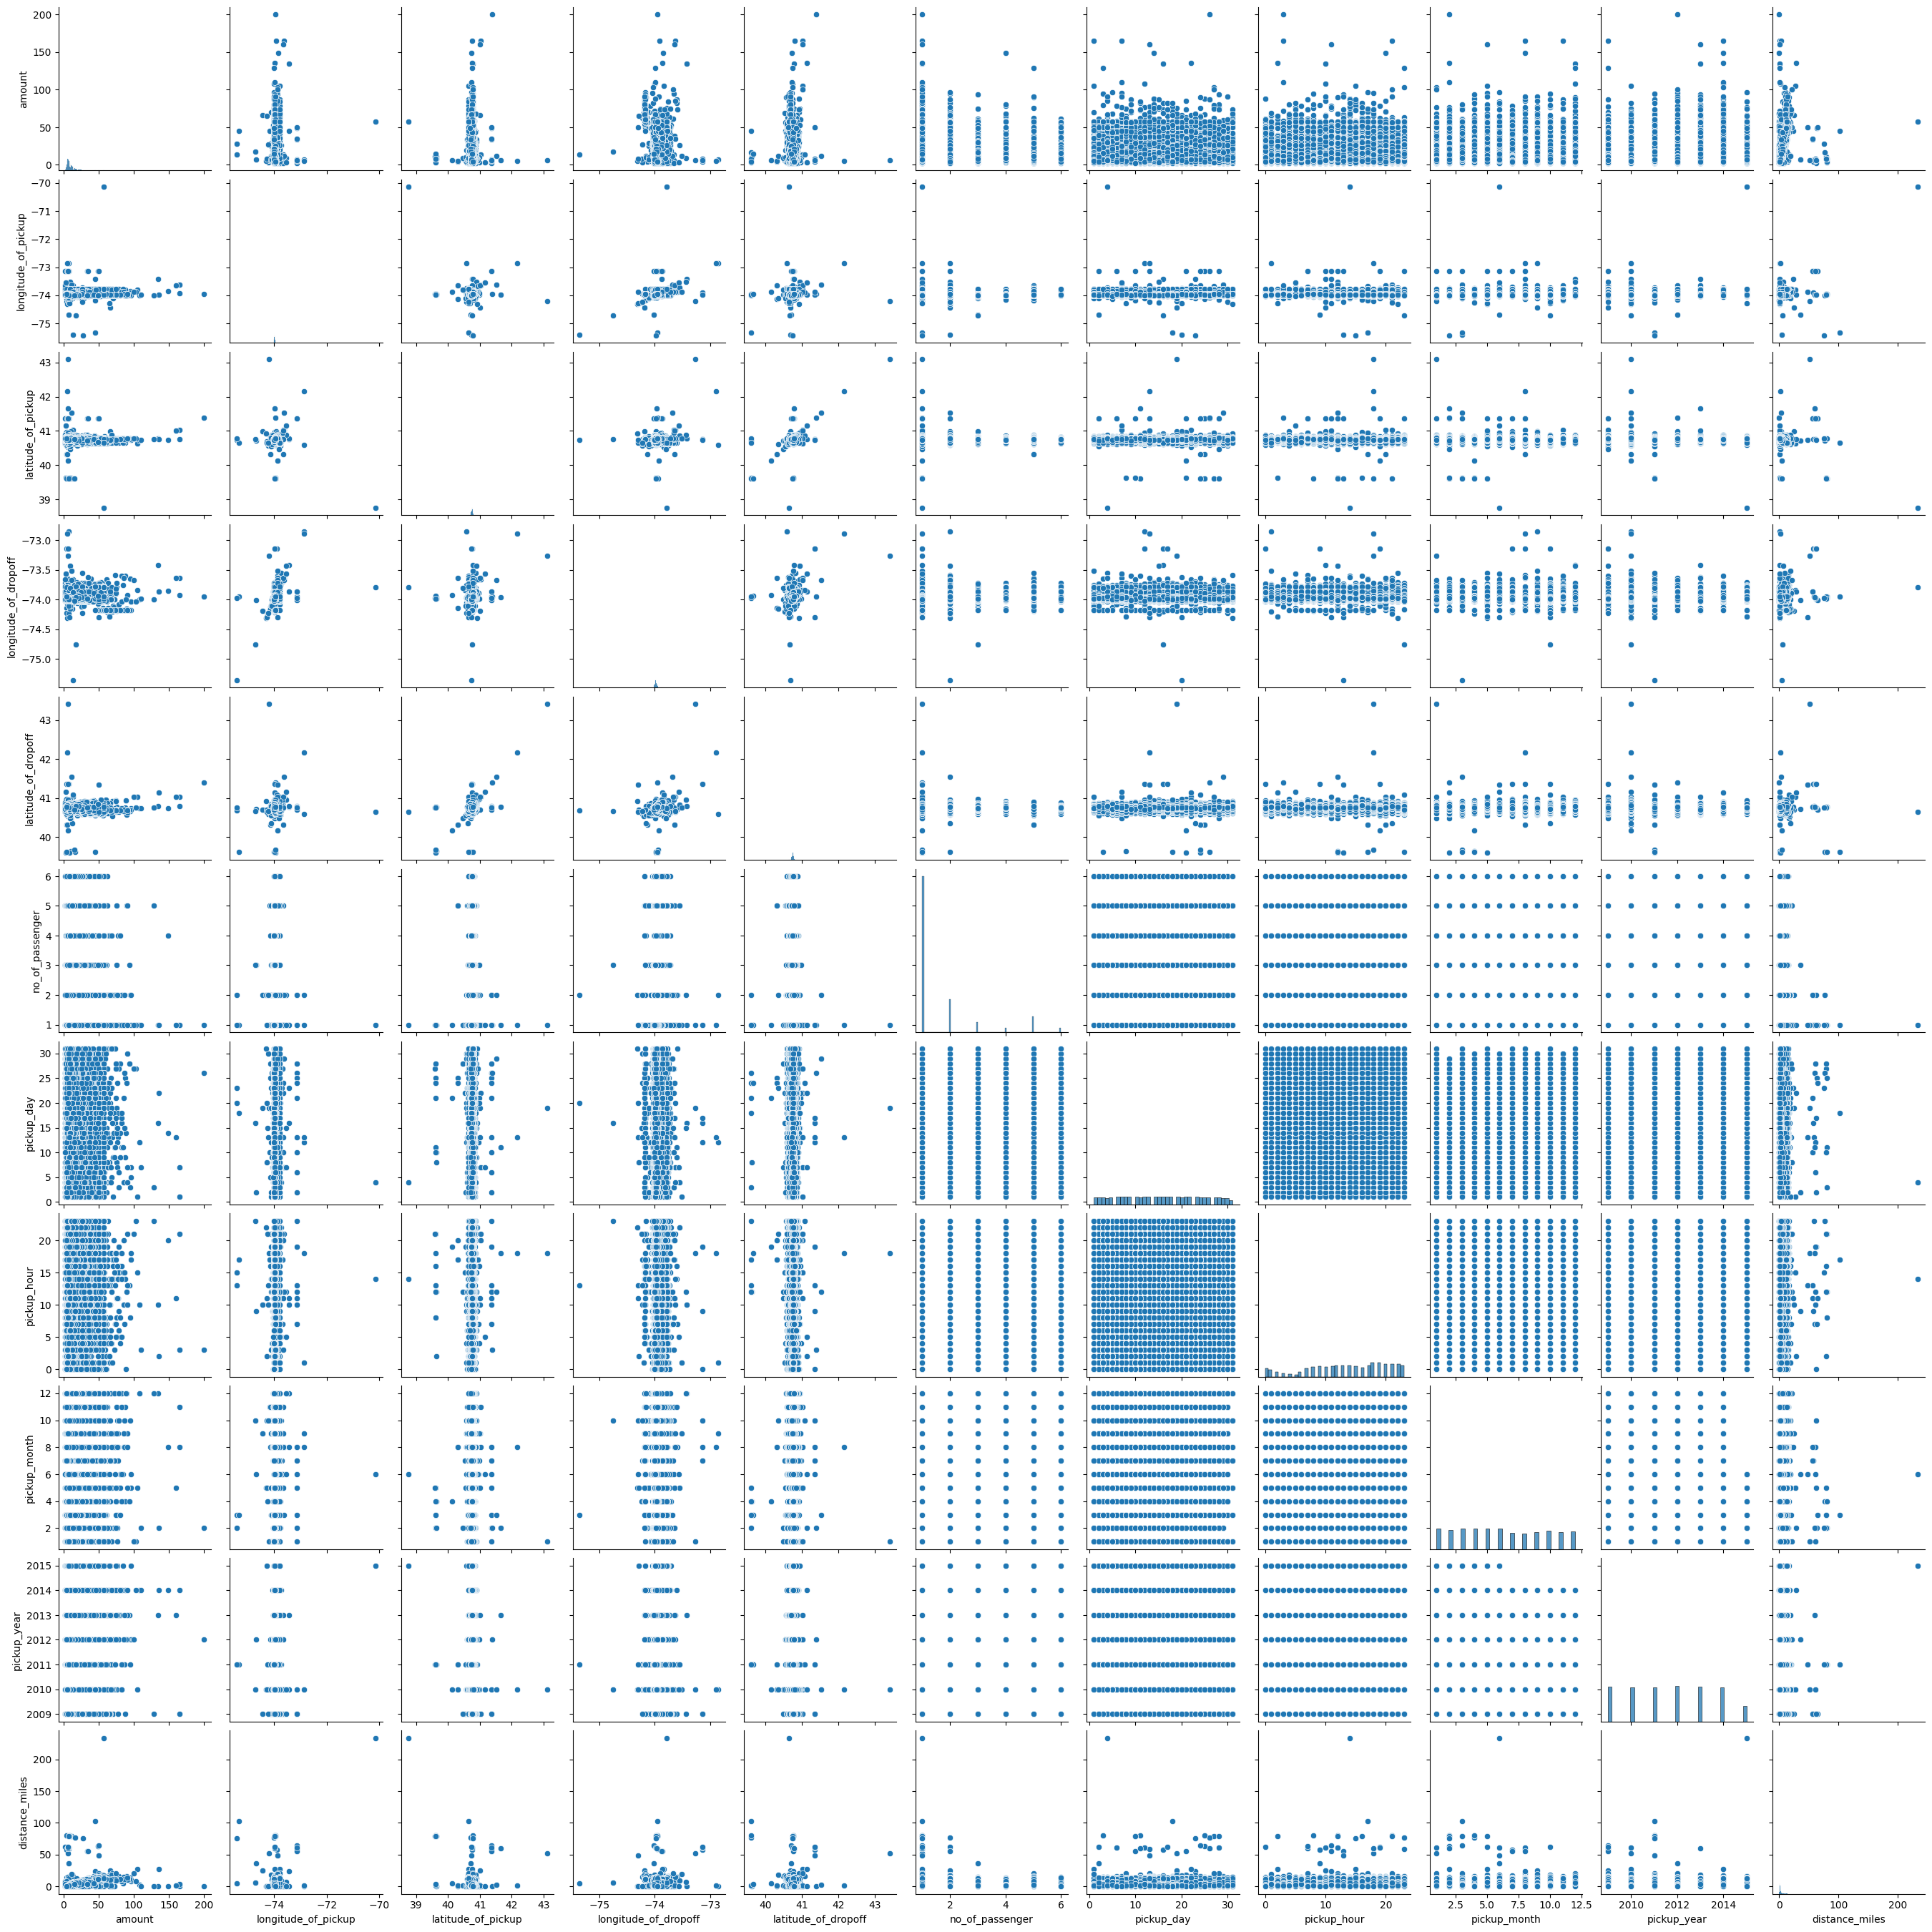

In [21]:
sns.pairplot(taxi_df)

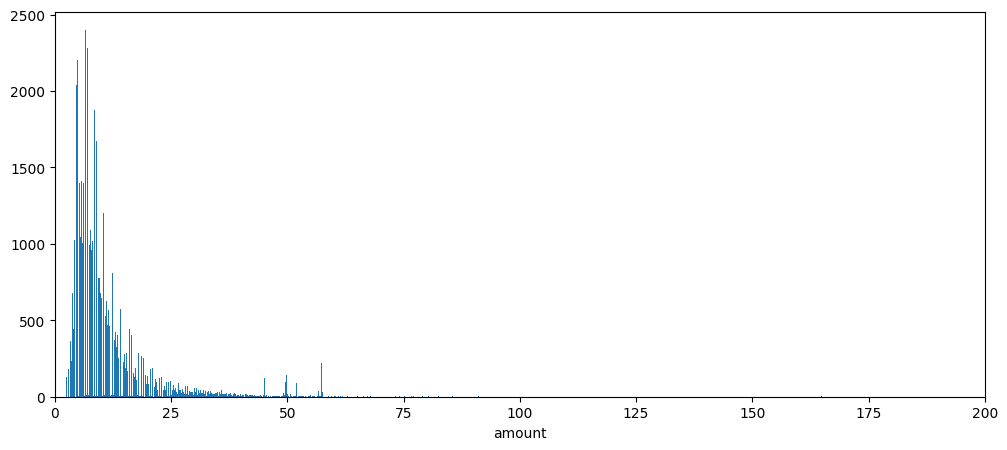

In [22]:
plt.figure(figsize=(12,5))
n,bins,patches = plt.hist(taxi_df.amount,1000)
plt.xlabel('amount')
plt.xlim(0,200)

plt.show();

Text(0, 0.5, 'count')

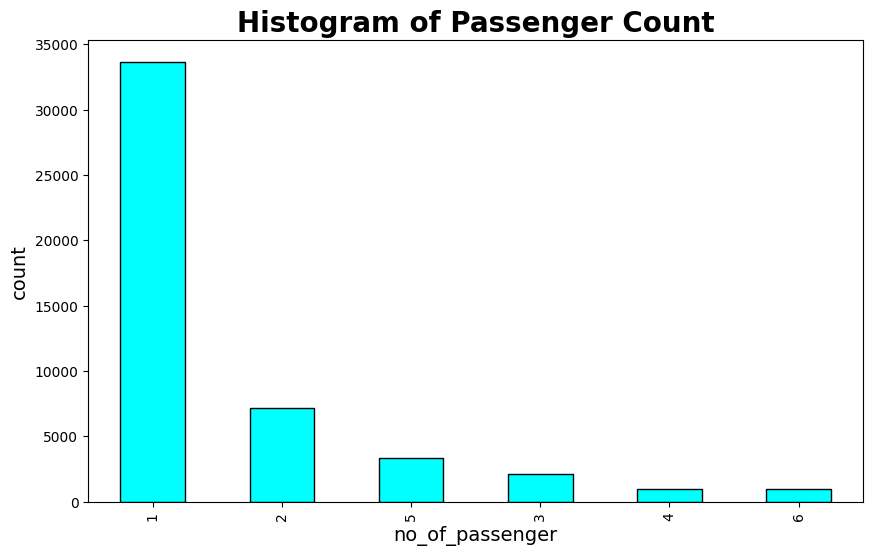

In [42]:
plt.figure(figsize=(10,6))
taxi_df['no_of_passenger'].value_counts().plot.bar(color='cyan',edgecolor='k');
plt.title('Histogram of Passenger Count',fontsize=20,fontweight='bold')
plt.xlabel('no_of_passenger',fontsize=14)
plt.ylabel('count',fontsize=14)

Text(0, 0.5, 'count')

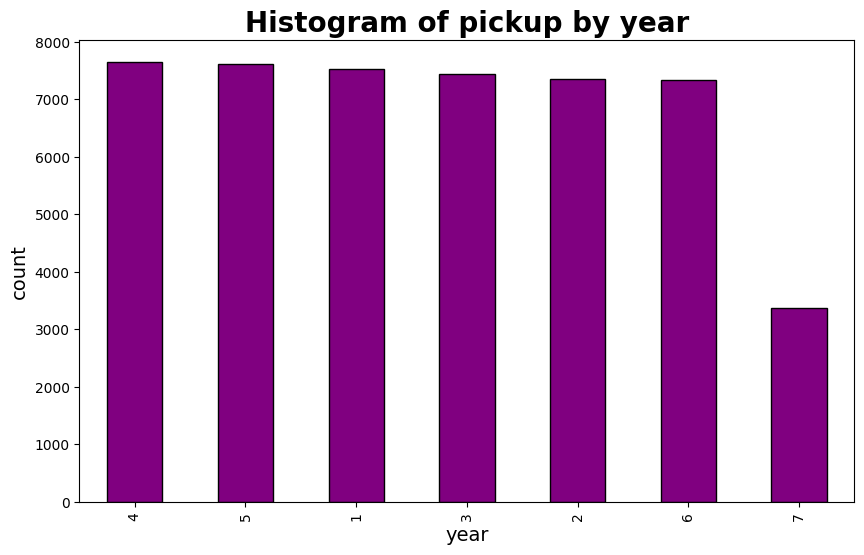

In [41]:
plt.figure(figsize=(10,6))
taxi_df['pickup_year'].value_counts().plot.bar(color='purple',edgecolor='k');
plt.title('Histogram of pickup by year',fontsize=20,fontweight='bold')
plt.xlabel('year',fontsize=14)
plt.ylabel('count',fontsize=14)

Text(0, 0.5, 'count')

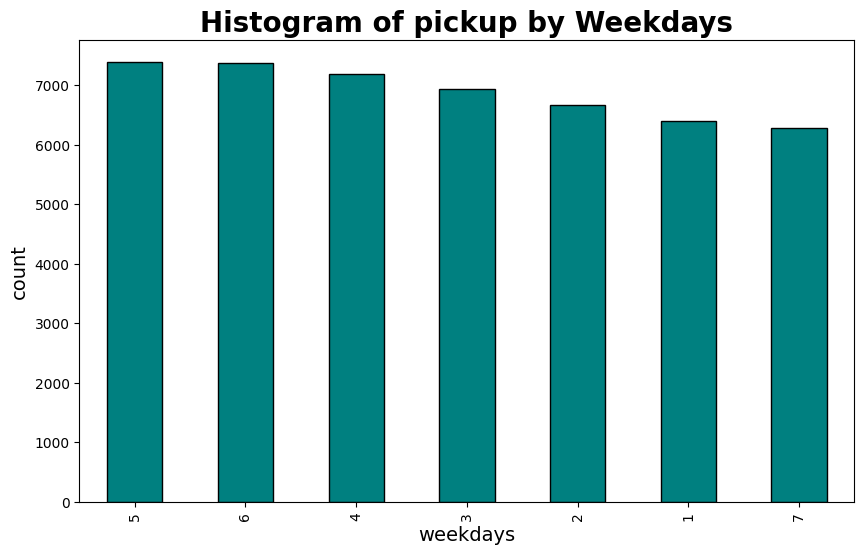

In [43]:
plt.figure(figsize=(10,6))
taxi_df['pickup_day_of_week'].value_counts().plot.bar(color='teal',edgecolor='k');
plt.title('Histogram of pickup by Weekdays',fontsize=20,fontweight='bold')
plt.xlabel('weekdays',fontsize=14)
plt.ylabel('count',fontsize=14)

<Axes: >

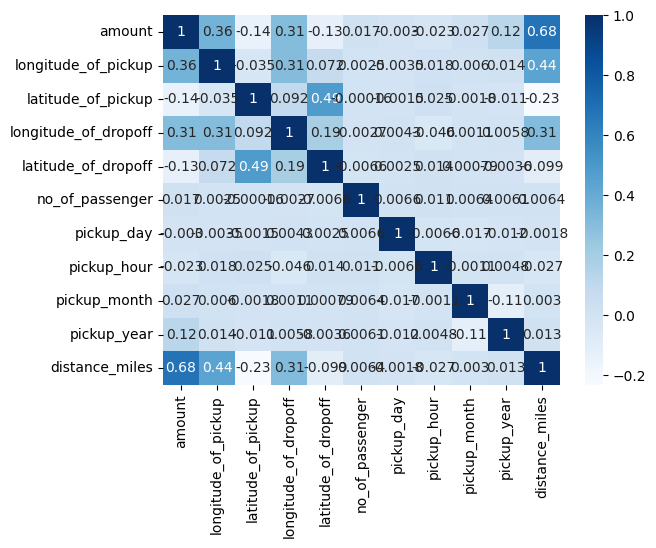

In [26]:
sns.heatmap(taxi_df.corr(),annot=True,cmap="Blues")

In [27]:
taxi_df['pickup_year']=taxi_df['pickup_year'].replace({2009:1,2010:2,2011:3,2012:4,2013:5,2014:6,2015:7})
taxi_df['pickup_day_of_week']=taxi_df['pickup_day_of_week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
taxi_df.drop(['date_time_of_pickup','pickup_date'],axis=1,inplace=True)
taxi_df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2,1.242218


In [28]:
X=taxi_df.drop(['amount'],axis=1)
Y=taxi_df[['amount']]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [30]:
X_train

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
17532,-73.873023,40.774033,-73.951433,40.712333,1,2,12,5,9,3,5.917896
14600,-73.983888,40.749327,-73.980257,40.733557,4,30,22,1,9,5,1.106057
35561,-73.986012,40.740888,-73.956773,40.780623,3,9,18,6,4,3,3.143066
13209,-73.955911,40.717551,-73.995515,40.720850,1,13,0,5,7,4,2.086428
42271,-74.008732,40.712447,-73.979047,40.787163,1,19,1,6,2,3,5.391143
...,...,...,...,...,...,...,...,...,...,...,...
11682,-73.967795,40.762833,-73.971687,40.757426,2,29,17,6,1,3,0.425507
46332,-73.958257,40.768691,-73.974175,40.750928,1,4,10,5,11,3,1.483334
39511,-73.991202,40.750353,-73.836408,40.713803,1,15,1,2,10,5,8.488853
894,-74.004737,40.751987,-73.974168,40.743227,5,21,18,7,6,1,1.710767


In [31]:
Y_train

,amount
17532,17.70
14600,7.50
35561,10.50
13209,8.90
42271,16.10
...,...
11682,4.10
46332,8.10
39511,35.33
894,8.90


In [33]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(X_train,Y_train)
Y_pred=model_1.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

print(mean_squared_error(Y_test,Y_pred)** 0.5)
print(model_1.score(X_train,Y_train))
print(model_1.score(X_test,Y_test))

6.982964225109879
0.5089726108942603
0.4692820374048112


In [34]:
from sklearn.tree import DecisionTreeRegressor

model_2=DecisionTreeRegressor()
model_2.fit(X_train,Y_train)
Y_pred=model_2.predict(X_test)

print(mean_squared_error(Y_test,Y_pred)** 0.5)
print(model_2.score(X_train,Y_train))
print(model_2.score(X_test,Y_test))

5.5538298546886065
1.0
0.6642861224783709


In [35]:
from sklearn.ensemble import RandomForestRegressor

model_3=RandomForestRegressor()
model_3.fit(X_train,Y_train)
Y_pred=model_3.predict(X_test)

print(mean_squared_error(Y_test,Y_pred)** 0.5)
print(model_3.score(X_train,Y_train))
print(model_3.score(X_test,Y_test))

4.3179777462265445
0.9757641488265095
0.797070608880221


In [36]:
from sklearn.ensemble import BaggingRegressor

model_4=BaggingRegressor()
model_4.fit(X_train,Y_train)
Y_pred=model_4.predict(X_test)

print(mean_squared_error(Y_test,Y_pred)** 0.5)
print(model_4.score(X_train,Y_train))
print(model_4.score(X_test,Y_test))

4.448607165949747
0.9703907445597624
0.7846066618654631


In [37]:
from sklearn.ensemble import AdaBoostRegressor

model_5=AdaBoostRegressor()
model_5.fit(X_train,Y_train)
Y_pred=model_5.predict(X_test)

print(mean_squared_error(Y_test,Y_pred)** 0.5)
print(model_5.score(X_train,Y_train))
print(model_5.score(X_test,Y_test))

12.464840686351918
-0.6451051197080244
-0.691054549087595


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

model_6=GradientBoostingRegressor()
model_6.fit(X_train,Y_train)
Y_pred=model_6.predict(X_test)

print(mean_squared_error(Y_test,Y_pred)** 0.5)
print(model_6.score(X_train,Y_train))
print(model_6.score(X_test,Y_test))

4.359383175891785
0.8820028961642703
0.7931601375145098
